In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale=1.2)


In [2]:
PsitesPfamAll_TABLE=pd.read_csv('DOMAIN_Manuscript_Table.txt',sep='\t')
avgDomain=pd.read_csv('Mansucript_Table_across_FAMILY_percentage.txt',sep='\t')

PsitesPfamAll_TABLE.head()

,ACC_ID,Pfam_ID,#Psites_pfam,#pS,#pT,#pY,STY_count,countS,countT,countY,domain_length,perc.psites,Pfam_fam,Pfam_short,Pfam_desc
0,A0A075B759,PF00160,1,0,1,0,22,9,10,3,157,4.545455,Cyclophil-like,Pro_isomerase,Cyclophilin type peptidyl-prolyl cis-trans iso...
1,A0A0B4J2A2,PF00160,1,0,1,0,23,9,11,3,157,4.347826,Cyclophil-like,Pro_isomerase,Cyclophilin type peptidyl-prolyl cis-trans iso...
2,F5H284,PF00160,1,0,1,0,23,9,11,3,157,4.347826,Cyclophil-like,Pro_isomerase,Cyclophilin type peptidyl-prolyl cis-trans iso...
3,P0DN26,PF00160,1,0,1,0,22,9,10,3,157,4.545455,Cyclophil-like,Pro_isomerase,Cyclophilin type peptidyl-prolyl cis-trans iso...
4,P0DN37,PF00160,1,0,1,0,23,9,11,3,157,4.347826,Cyclophil-like,Pro_isomerase,Cyclophilin type peptidyl-prolyl cis-trans iso...


In [3]:
PsitesPfamAll_TABLE.Pfam_ID.nunique()

3537

3537
                                     Phospho_domains  #Proteins
0                              Protein kinase domain        187
1                             Zinc finger, C2H2 type        134
2  RNA recognition motif. (a.k.a. RRM, RBD, or RN...         98
3                                          PH domain         75
4       Protein tyrosine and serine/threonine kinase         73
5                                         Ras family         66
6                                          C2 domain         54
7                      Intermediate filament protein         54
8                                         PDZ domain         53
9                           WD domain, G-beta repeat         43


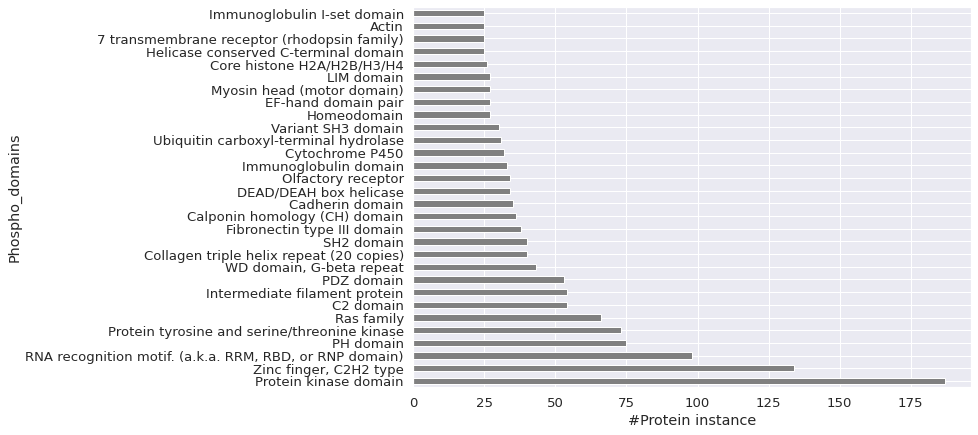

In [4]:
######################################  MOST represented Families (no.of diff.Proteins per family)

print (PsitesPfamAll_TABLE['Pfam_short'].nunique())
protein_per_dom=PsitesPfamAll_TABLE['Pfam_desc'].value_counts().rename_axis('Phospho_domains').reset_index(name='#Proteins')
print (protein_per_dom.head(10))
sns.set(style='darkgrid')
sns.set(font_scale=1.2)

protein_per_dom=protein_per_dom[protein_per_dom['#Proteins']>=25] # Domain_overall.png
protein_per_dom.plot(x='Phospho_domains',y='#Proteins',kind='barh', color="grey",figsize=(10,7),legend=False)
plt.xlabel("")
plt.xlabel("#Protein instance")
PsitesPfamAll_TABLE['perc.pS']=PsitesPfamAll_TABLE['#pS']/PsitesPfamAll_TABLE['countS']*100
PsitesPfamAll_TABLE['perc.pT']=PsitesPfamAll_TABLE['#pT']/PsitesPfamAll_TABLE['countT']*100
PsitesPfamAll_TABLE['perc.pY']=PsitesPfamAll_TABLE['#pY']/PsitesPfamAll_TABLE['countY']*100




# domains most contributed 21


Text(0.5, 0, 'Total phosphorylation occupancy from all instances')

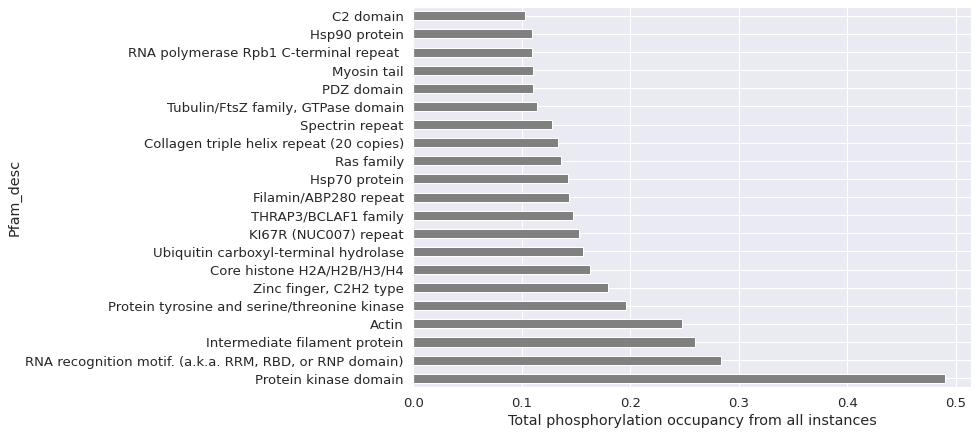

In [5]:
####################################################################### contributionm ot proeome (25% break down)
avgdomain_filt=avgDomain[avgDomain['Phos_contribution_fromallproteins_toproteome_92453']>=0.1]
avgdomain_filt=avgdomain_filt.sort_values('Phos_contribution_fromallproteins_toproteome_92453',ascending=False)
print ("# domains most contributed",avgdomain_filt.shape[0])
avgdomain_filt.plot(x='Pfam_desc',y='Phos_contribution_fromallproteins_toproteome_92453',kind='barh', color="grey",figsize=(10,7),legend=False)
plt.xlabel("Total phosphorylation occupancy from all instances")

In [6]:
###############################################################
print ("Total STY domain",PsitesPfamAll_TABLE['STY_count'].sum())
print ("Total phosphorylated",PsitesPfamAll_TABLE['#Psites_pfam'].sum())
# print ("% proteome",Scop3Pall['#P-sites'].sum()/Scop3Pall['SEQ_length'].sum()*100)
print ("% phosphrylated in domain",PsitesPfamAll_TABLE['#Psites_pfam'].sum()/PsitesPfamAll_TABLE['STY_count'].sum()*100)



print ("Total countS",PsitesPfamAll_TABLE['countS'].sum(),PsitesPfamAll_TABLE['#pS'].sum(),PsitesPfamAll_TABLE['#pS'].sum()/PsitesPfamAll_TABLE['countS'].sum()*100)
print ("Total countT",PsitesPfamAll_TABLE['countT'].sum(),PsitesPfamAll_TABLE['#pT'].sum(),PsitesPfamAll_TABLE['#pT'].sum()/PsitesPfamAll_TABLE['countT'].sum()*100)
print ("Total countY",PsitesPfamAll_TABLE['countY'].sum(),PsitesPfamAll_TABLE['#pY'].sum(),PsitesPfamAll_TABLE['#pY'].sum()/PsitesPfamAll_TABLE['countY'].sum()*100)


Total STY domain 307572
Total phosphorylated 20954
% phosphrylated in domain 6.8127137710844945
Total countS 144656 13216 9.136157504700808
Total countT 102998 4939 4.795238742499854
Total countY 59918 2799 4.671384225107647


   ACC_ID  Pfam_ID  #Psites_pfam  #pS  #pT  #pY  STY_count  countS  countT  \
0  O95757  PF00012            16   12    3    1        103      47      34   
1  P38646  PF00012            11    5    4    2         80      30      40   
2  P11142  PF00012            17    8    5    4         91      30      46   
3  P54652  PF00012             6    0    4    2         93      30      47   
4  P48723  PF00012             3    2    1    0         71      35      24   

   countY  domain_length  perc.psites      Pfam_fam Pfam_short      Pfam_desc  \
0      22            710    15.533981  Actin_ATPase      HSP70  Hsp70 protein   
1      10            599    13.750000  Actin_ATPase      HSP70  Hsp70 protein   
2      15            607    18.681319  Actin_ATPase      HSP70  Hsp70 protein   
3      16            609     6.451613  Actin_ATPase      HSP70  Hsp70 protein   
4      12            451     4.225352  Actin_ATPase      HSP70  Hsp70 protein   

     perc.pS    perc.pT    perc.pY  
0  25.5

<ipython-input-7-745db84c92bd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSP90['pS']=HSP90['perc.pS']/HSP90[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
<ipython-input-7-745db84c92bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSP90['pT']=HSP90['perc.pT']/HSP90[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
<ipython-input-7-745db84c92bd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Text(0, 0.5, 'phosphorylated (%)')

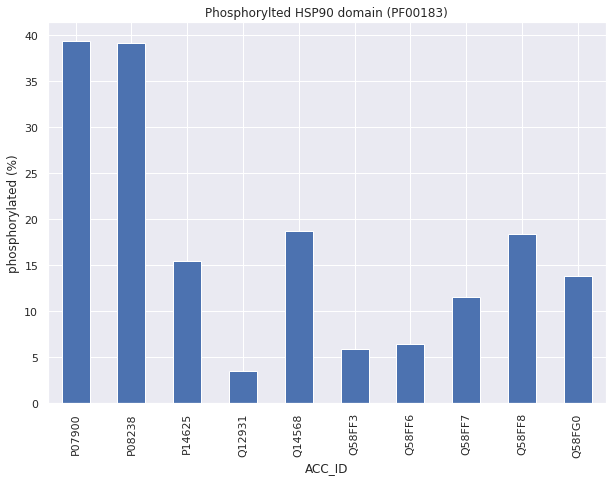

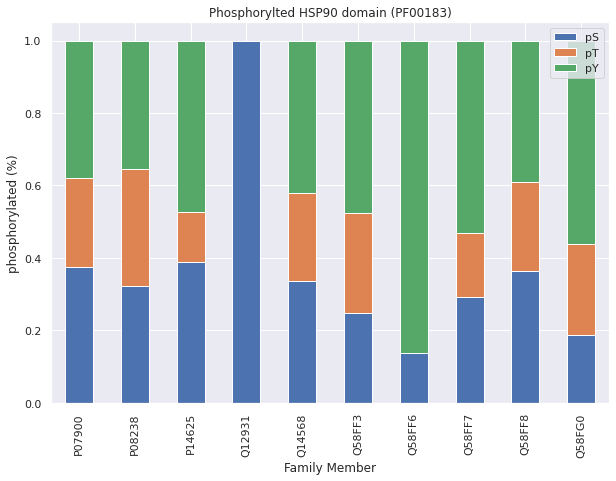

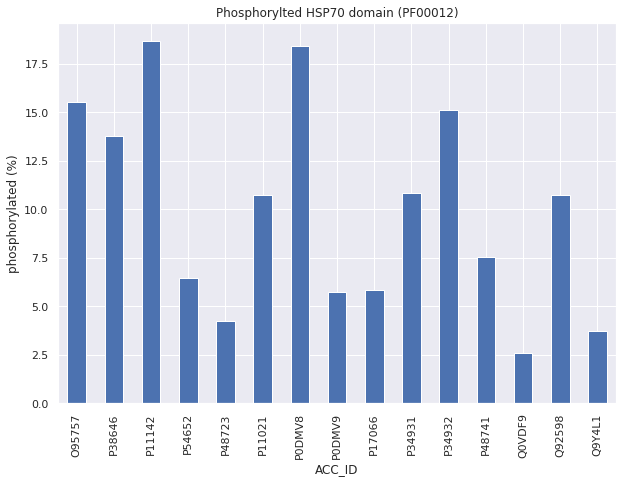

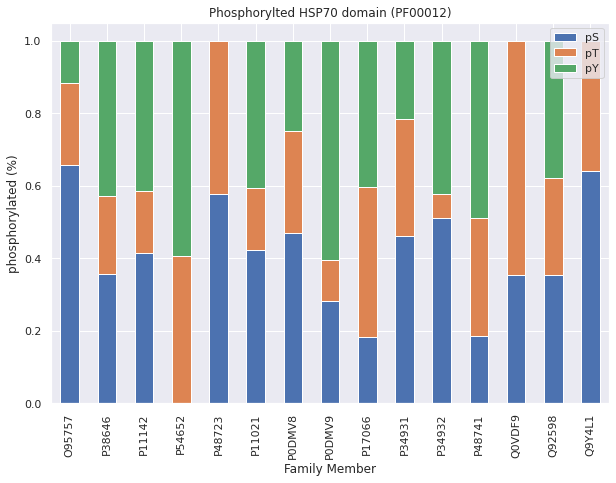

In [7]:
############################# PLOT % information total and STY seperately for HSP90
HSP90=PsitesPfamAll_TABLE[PsitesPfamAll_TABLE['Pfam_short']=='HSP90']   
sns.set(style='darkgrid')

HSP90.plot(x='ACC_ID',y=['perc.psites'],kind='bar', stacked=False,figsize=(10,7),legend=False) #HSP90_2
plt.ylabel("phosphorylated (%)")

plt.title("Phosphorylted HSP90 domain (PF00183)")
HSP90['pS']=HSP90['perc.pS']/HSP90[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
HSP90['pT']=HSP90['perc.pT']/HSP90[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
HSP90['pY']=HSP90['perc.pY']/HSP90[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
HSP90.plot(x='ACC_ID',y=['pS','pT','pY'],kind='bar', stacked=True,figsize=(10,7))

plt.title("Phosphorylted HSP90 domain (PF00183)")
plt.legend(loc='upper right')
plt.xlabel("Family Member")
plt.ylabel("phosphorylated (%)")

############################# PLOT % information total and STY seperately for HSP70
HSP70_m=PsitesPfamAll_TABLE[PsitesPfamAll_TABLE['Pfam_short']=='HSP70']  #HSP70_1

HSP70_m = HSP70_m.set_index('ACC_ID')
HSP70_m=HSP70_m.loc[['O95757', 'P38646','P11142','P54652','P48723', 'P11021','P0DMV8', 'P0DMV9',  'P17066', 'P34931', 'P34932',  'P48741',  'Q0VDF9', 'Q92598', 'Q9Y4L1']]
HSP70=HSP70_m.reset_index()
print (HSP70.head())
HSP70.plot(x="ACC_ID",y=['perc.psites'],kind='bar', stacked=False,figsize=(10,7),legend=False) #HSP70_2
plt.ylabel("phosphorylated (%)")
plt.title("Phosphorylted HSP70 domain (PF00012)")
HSP70['pS']=HSP70['perc.pS']/HSP70[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
HSP70['pT']=HSP70['perc.pT']/HSP70[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
HSP70['pY']=HSP70['perc.pY']/HSP70[['perc.pS','perc.pT','perc.pY']].sum(axis=1)

HSP70.plot(x="ACC_ID",y=['pS','pT','pY'],kind='bar', stacked=True,figsize=(10,7))
plt.title("Phosphorylted HSP70 domain (PF00012)")
plt.legend(loc='upper right')
plt.xlabel("Family Member")
plt.ylabel("phosphorylated (%)")

1285 349 184 806 63 288 562


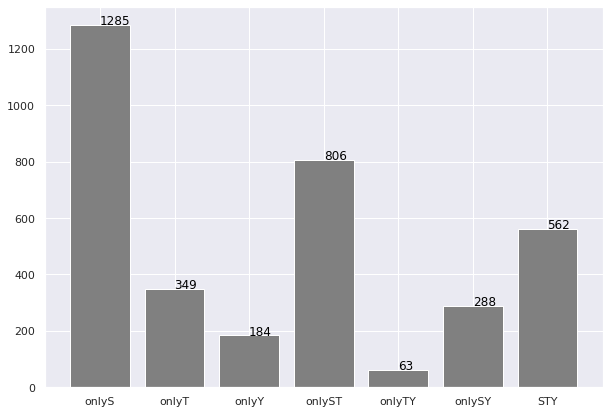

In [8]:
########################################################################## Residue specific Domain phopshorylation
onlyS=avgDomain[(avgDomain['avg_#pS']>0) & (avgDomain['avg_#pT']==0)&(avgDomain['avg_#pY']==0)]
onlyT=avgDomain[(avgDomain['avg_#pT']>0) & (avgDomain['avg_#pS']==0)&(avgDomain['avg_#pY']==0)]
onlyY=avgDomain[(avgDomain['avg_#pY']>0) & (avgDomain['avg_#pS']==0)&(avgDomain['avg_#pT']==0)]
onlyST=avgDomain[(avgDomain['avg_#pS']>0) & (avgDomain['avg_#pT']>0)&(avgDomain['avg_#pY']==0)]
onlyTY=avgDomain[(avgDomain['avg_#pT']>0) & (avgDomain['avg_#pS']==0)&(avgDomain['avg_#pY']>0)]
onlySY=avgDomain[(avgDomain['avg_#pY']>0) & (avgDomain['avg_#pS']>0)&(avgDomain['avg_#pT']==0)]
STY=avgDomain[(avgDomain['avg_#pY']>0) & (avgDomain['avg_#pS']>0)&(avgDomain['avg_#pT']>0)]
sns.set(style='darkgrid')
print (onlyS.shape[0],onlyT.shape[0],onlyY.shape[0],onlyST.shape[0],onlyTY.shape[0],onlySY.shape[0],STY.shape[0])
plt.figure(figsize=(10,7))

plt.bar(['onlyS','onlyT','onlyY','onlyST','onlyTY','onlySY','STY'],\
        [onlyS.shape[0],onlyT.shape[0],onlyY.shape[0],onlyST.shape[0],onlyTY.shape[0],onlySY.shape[0],STY.shape[0]],color='grey')

for i, v in enumerate([onlyS.shape[0],onlyT.shape[0],onlyY.shape[0],onlyST.shape[0],onlyTY.shape[0],onlySY.shape[0],STY.shape[0]]):
    plt.text(i+0,v, str(v), color='black', fontweight='regular')

<ipython-input-9-c49617d1fa74>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Histdeacyl['pS']=Histdeacyl['perc.pS']/Histdeacyl[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
<ipython-input-9-c49617d1fa74>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Histdeacyl['pT']=Histdeacyl['perc.pT']/Histdeacyl[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
<ipython-input-9-c49617d1fa74>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Text(0, 0.5, 'phosphorylated (%)')

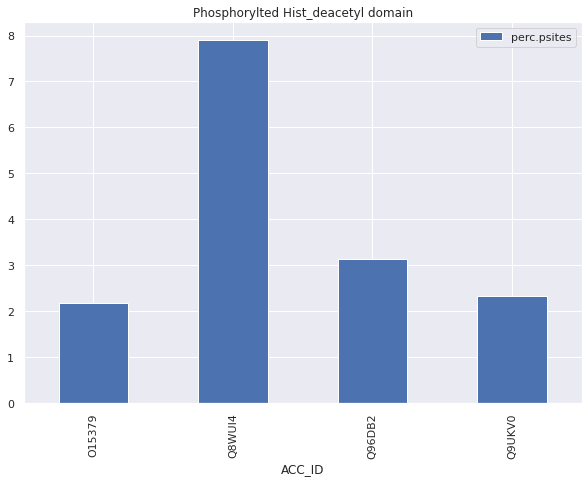

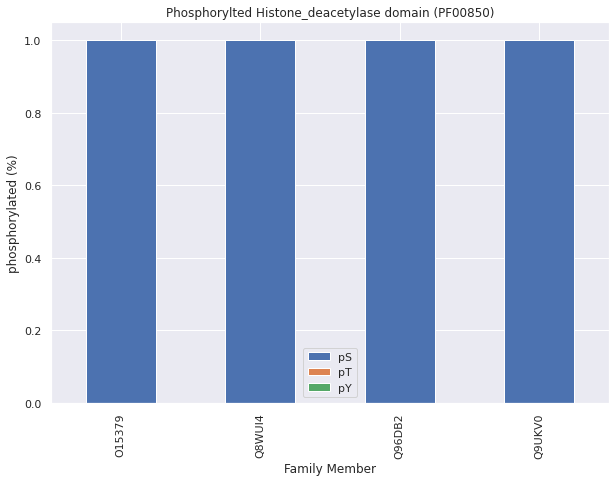

In [9]:
################################################################# example PF00850

Histdeacyl=PsitesPfamAll_TABLE[PsitesPfamAll_TABLE['Pfam_short']=='Hist_deacetyl']


Histdeacyl.plot(x='ACC_ID',y=['perc.psites'],kind='bar', stacked=False,figsize=(10,7))
plt.title("Phosphorylted Hist_deacetyl domain")
Histdeacyl['pS']=Histdeacyl['perc.pS']/Histdeacyl[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
Histdeacyl['pT']=Histdeacyl['perc.pT']/Histdeacyl[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
Histdeacyl['pY']=Histdeacyl['perc.pY']/Histdeacyl[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
Histdeacyl.plot(x='ACC_ID',y=['pS','pT','pY'],kind='bar', stacked=True,figsize=(10,7))
plt.title("Phosphorylted Histone_deacetylase domain (PF00850)")
plt.xlabel("Family Member")
plt.ylabel("phosphorylated (%)")


<ipython-input-10-e9a31b6b02bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zincbind['pS']=zincbind['perc.pS']/zincbind[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
<ipython-input-10-e9a31b6b02bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zincbind['pT']=zincbind['perc.pT']/zincbind[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
<ipython-input-10-e9a31b6b02bb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Text(0, 0.5, 'phosphorylated (%)')

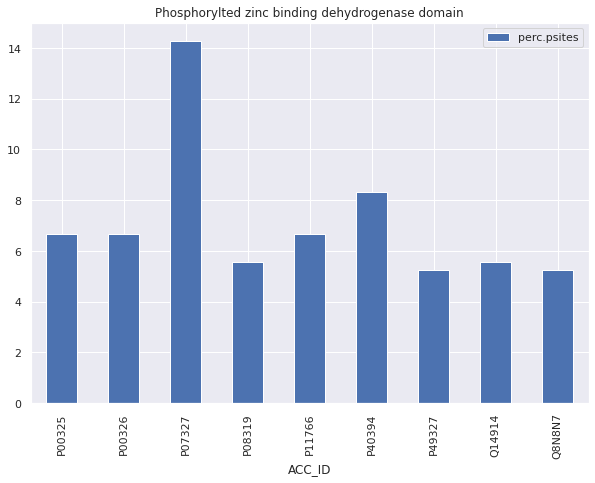

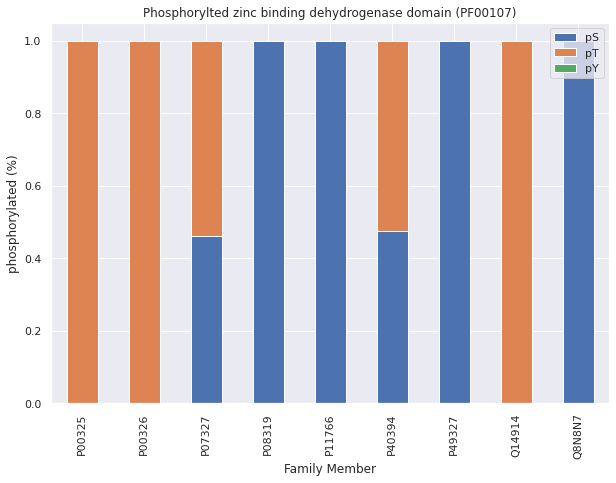

In [10]:
################################################################# example PF00107 zinc binding dehydrogenase

zincbind=PsitesPfamAll_TABLE[PsitesPfamAll_TABLE['Pfam_ID']=='PF00107']


zincbind.plot(x='ACC_ID',y=['perc.psites'],kind='bar', stacked=False,figsize=(10,7))
plt.title("Phosphorylted zinc binding dehydrogenase domain")
zincbind['pS']=zincbind['perc.pS']/zincbind[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
zincbind['pT']=zincbind['perc.pT']/zincbind[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
zincbind['pY']=zincbind['perc.pY']/zincbind[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
zincbind.plot(x='ACC_ID',y=['pS','pT','pY'],kind='bar', stacked=True,figsize=(10,7))
plt.title("Phosphorylted zinc binding dehydrogenase domain (PF00107)")
plt.xlabel("Family Member")
plt.ylabel("phosphorylated (%)")

<ipython-input-11-bb7b43cc34eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actin['pS']=actin['perc.pS']/actin[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
<ipython-input-11-bb7b43cc34eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actin['pT']=actin['perc.pT']/actin[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
<ipython-input-11-bb7b43cc34eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Text(0, 0.5, 'phosphorylated (%)')

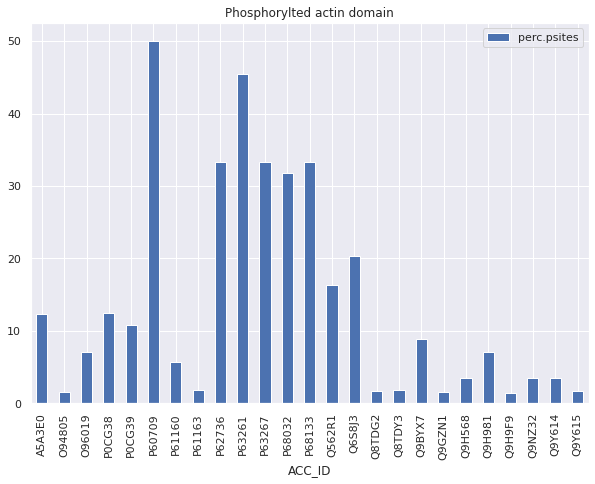

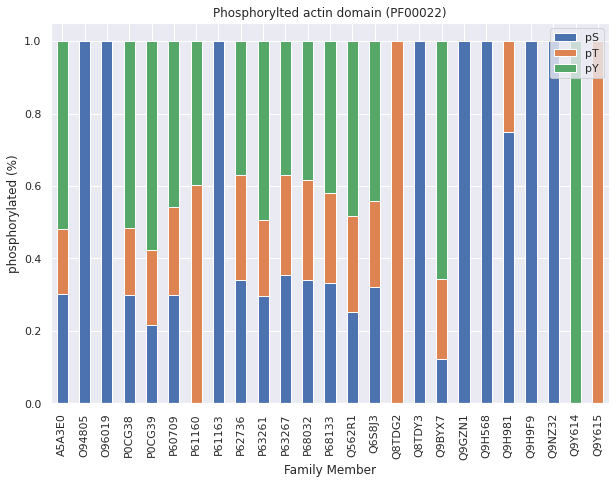

In [11]:
################################################################# example PF00022 # actin

actin=PsitesPfamAll_TABLE[PsitesPfamAll_TABLE['Pfam_ID']=='PF00022']


actin.plot(x='ACC_ID',y=['perc.psites'],kind='bar', stacked=False,figsize=(10,7))
plt.title("Phosphorylted actin domain")
actin['pS']=actin['perc.pS']/actin[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
actin['pT']=actin['perc.pT']/actin[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
actin['pY']=actin['perc.pY']/actin[['perc.pS','perc.pT','perc.pY']].sum(axis=1)
actin.plot(x='ACC_ID',y=['pS','pT','pY'],kind='bar', stacked=True,figsize=(10,7))
plt.title("Phosphorylted actin domain (PF00022)")

plt.xlabel("Family Member")
plt.ylabel("phosphorylated (%)")